In [1]:
!pip install opencv-python-headless                #1
!pip install tensorflow


In [2]:
import cv2                                                 #2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab.patches import cv2_imshow

In [4]:
model = load_model('/content/emotion_detection_model.h5')          #3

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
emotion_labels = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']  #4


<IPython.core.display.Javascript object>

Saved to photo.jpg


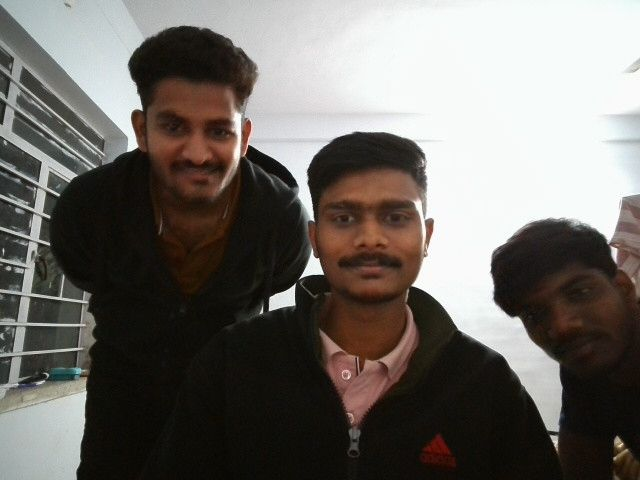

In [9]:
from IPython.display import display, Javascript     #5
from google.colab.output import eval_js
from base64 import b64decode
import cv2
import numpy as np
from tensorflow.keras.preprocessing.image import img_to_array

def take_photo(filename='photo.jpg', quality=0.8):
    js = Javascript('''
    async function takePhoto(quality) {
        const div = document.createElement('div');
        const capture = document.createElement('button');
        capture.textContent = 'Capture';
        document.body.appendChild(div);
        div.appendChild(capture);

        const video = document.createElement('video');
        video.style.display = 'block';
        const stream = await navigator.mediaDevices.getUserMedia({video: true});

        div.appendChild(video);
        video.srcObject = stream;
        await new Promise((resolve) => video.onloadedmetadata = resolve);
        video.play();

        await new Promise((resolve) => capture.onclick = resolve);

        const canvas = document.createElement('canvas');
        canvas.width = video.videoWidth;
        canvas.height = video.videoHeight;
        canvas.getContext('2d').drawImage(video, 0, 0);
        stream.getVideoTracks()[0].stop();
        const dataUrl = canvas.toDataURL('image/jpeg', quality);
        div.remove();
        return dataUrl;
    }
    ''')
    display(js)
    data = eval_js('takePhoto({})'.format(quality))
    binary = b64decode(data.split(',')[1])
    with open(filename, 'wb') as f:
        f.write(binary)
    return filename

try:
    filename = take_photo()
    print('Saved to {}'.format(filename))

    # Show the image
    img = cv2.imread(filename)
    cv2_imshow(img)  # Use cv2_imshow here

except Exception as err:
    print(str(err))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


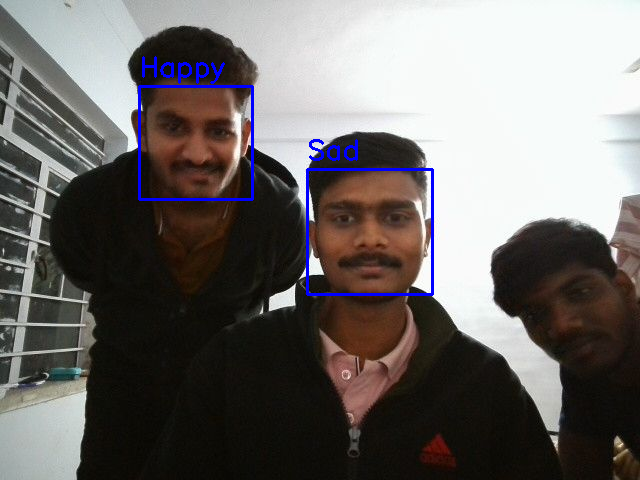

In [10]:
# Read the captured image                                   #6
frame = cv2.imread('photo.jpg')

# Convert to grayscale
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

# Load OpenCV's pre-trained face detector
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Detect faces
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    # Extract the face ROI
    roi_gray = gray[y:y + h, x:x + w]
    roi_gray = cv2.resize(roi_gray, (48, 48))
    roi = roi_gray.astype("float") / 255.0
    roi = img_to_array(roi)
    roi = np.expand_dims(roi, axis=0)

    # Predict the emotion
    preds = model.predict(roi)[0]
    emotion = emotion_labels[preds.argmax()]

    # Draw the face bounding box and label
    cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
    cv2.putText(frame, emotion, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

# Display the resulting frame
cv2_imshow(frame)  # Use cv2_imshow here
